In [1]:
import numpy as np
import h5py
import pandas as pd
import bluepysnap as bp

In [2]:
s = bp.Simulation('simulation_config.json')

In [3]:
population_name = s.reports['lfp_report'].population_names[0]

r  = s.reports['lfp_report'][population_name]

In [4]:
allData = r.get()

In [5]:
allData.columns = pd.MultiIndex.from_product((np.unique(allData.columns.get_level_values(0)),['Infinitesimal','Finite','Testing']),names=['gid','electrode'])


In [23]:
np.max(allData[180725]['Finite'])

1.2271915e-06

In [24]:
np.max(allData[192018]['Finite'])

9.880417e-08

In [16]:
ratio = allData.xs('Infinitesimal',axis=1,level='electrode')/allData.xs('Finite',axis=1,level='electrode')
ratios = ratio.values

In [13]:
ratios[np.isnan(ratios)]=1

In [15]:
np.unravel_index(np.argmax(ratios),ratios.shape)

(12881, 27371)

In [17]:
ratio.iloc[:,27371]

0.00            NaN
0.05      -4.356666
0.10      -2.694277
0.15      -1.727711
0.20      -1.184118
             ...   
1999.75    0.789302
1999.80    0.806442
1999.85    0.821151
1999.90    0.833921
1999.95    0.844443
Name: 192018, Length: 40000, dtype: float32

In [6]:
import matplotlib.pyplot as plt
%matplotlib ipympl

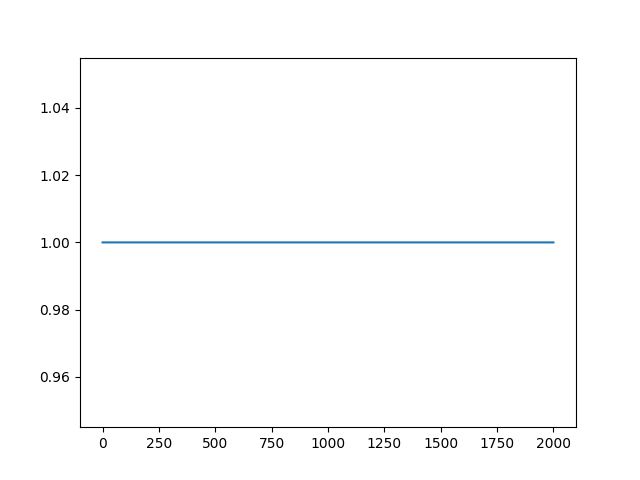

In [9]:
plt.figure()
plt.plot(allData[180725]['Infinitesimal']/allData[180725]['Finite'])

In [7]:
sumData = allData.groupby(axis=1, level='electrode').sum()


/tmp/ipykernel_1116735/2696192613.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sumData = allData.groupby(axis=1, level='electrode').sum()


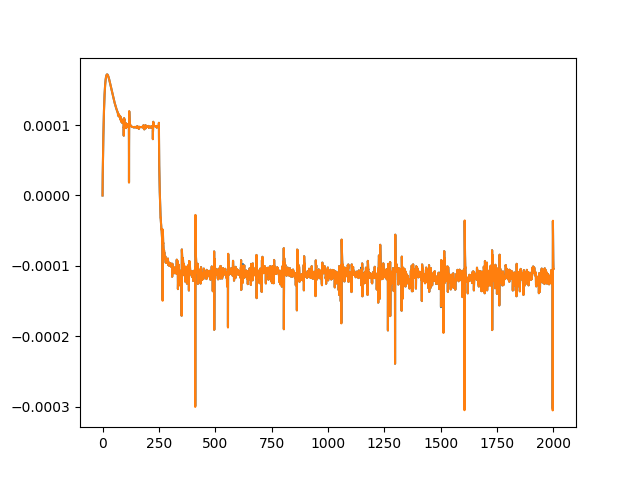

In [8]:
plt.figure()
plt.plot(sumData['Infinitesimal'])
plt.plot(sumData['Finite'])

In [9]:
difference = sumData['Finite']-sumData['Infinitesimal']

In [10]:
maxDiffIdx = np.argmax(np.abs(difference))

In [13]:
np.abs(difference).values[maxDiffIdx]/np.abs(sumData['Finite']).values[maxDiffIdx]

0.009940086

In [10]:
relDifference = difference/sumData['Finite']

In [11]:
ratio = sumData['Infinitesimal']/sumData['Finite']


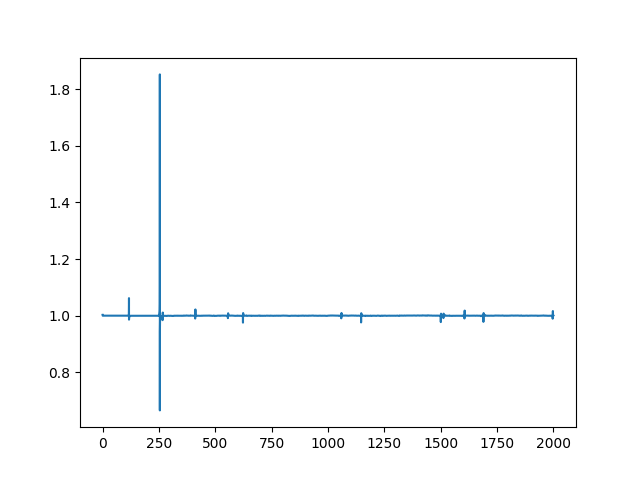

In [13]:
plt.figure()
plt.plot(ratio)
# plt.xlim([250,260])

In [15]:
allData[180725]

electrode,Infinitesimal,Finite,Testing
0.00,0.000000e+00,0.000000e+00,0.000000e+00
0.05,5.085399e-10,5.085399e-10,-1.118422e-17
0.10,8.678625e-10,8.678625e-10,-1.725237e-17
0.15,1.153386e-09,1.153386e-09,1.694066e-19
0.20,1.394603e-09,1.394603e-09,1.078104e-17
...,...,...,...
1999.75,-9.435836e-08,-9.435836e-08,-2.016616e-17
1999.80,-9.529472e-08,-9.529472e-08,5.052382e-17
1999.85,-9.604810e-08,-9.604810e-08,-1.199128e-16
1999.90,-9.669134e-08,-9.669134e-08,-2.144552e-16
